# LDA

This code is an example of using the Gensim library to perform topic modeling and visualize them for a given set of tweets. It uses the Latent Dirichlet Allocation (LDA) algorithm to discover topics within the tweet data. The coherence score is used to measure the interpretability and quality of the discovered topics.
In this notebook, I will walk through the tutorial provided at this link (https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know) and try to run a part of it in GoogleColab

**Importing Libraries:** importing various necessary libraries, including Gensim, pandas, pyLDAvis, and spacy. These libraries are used for data processing, topic modeling, visualization, and coherence calculation.

**Loading Tweet Data:** The code reads a CSV file containing tweet data using pd.read_csv. The tweets are then converted into a list of tokenized words.

**Creating a Dictionary and Corpus:** The code uses Gensim's Dictionary class to create a mapping from words to their integer IDs (id2word). Then, it constructs the term-document frequency matrix (corpus) using the doc2bow method.

**Building LDA Model:** The code builds an LDA model using Gensim's LdaModel class. It specifies various parameters such as the number of topics, random state, chunk size, alpha value, and per-word topics. The model is trained on the tweet corpus.


**Calculating Coherence Score:** The code calculates the coherence score of the LDA model using Gensim's CoherenceModel. The coherence score helps evaluate the quality of the topics. Higher coherence scores generally indicate more coherent and meaningful topics.

**Displaying pyLDAVvis:** Then using the pyLDAvis to serve two objectives:
* Better understanding and interpreting individual topics, and
* Better understanding the relationships between the topics.

Gensim is a Python library available for free and open-source use. Its primary purpose is to transform documents into semantic vectors in a manner that is both computationally efficient and user-friendly.

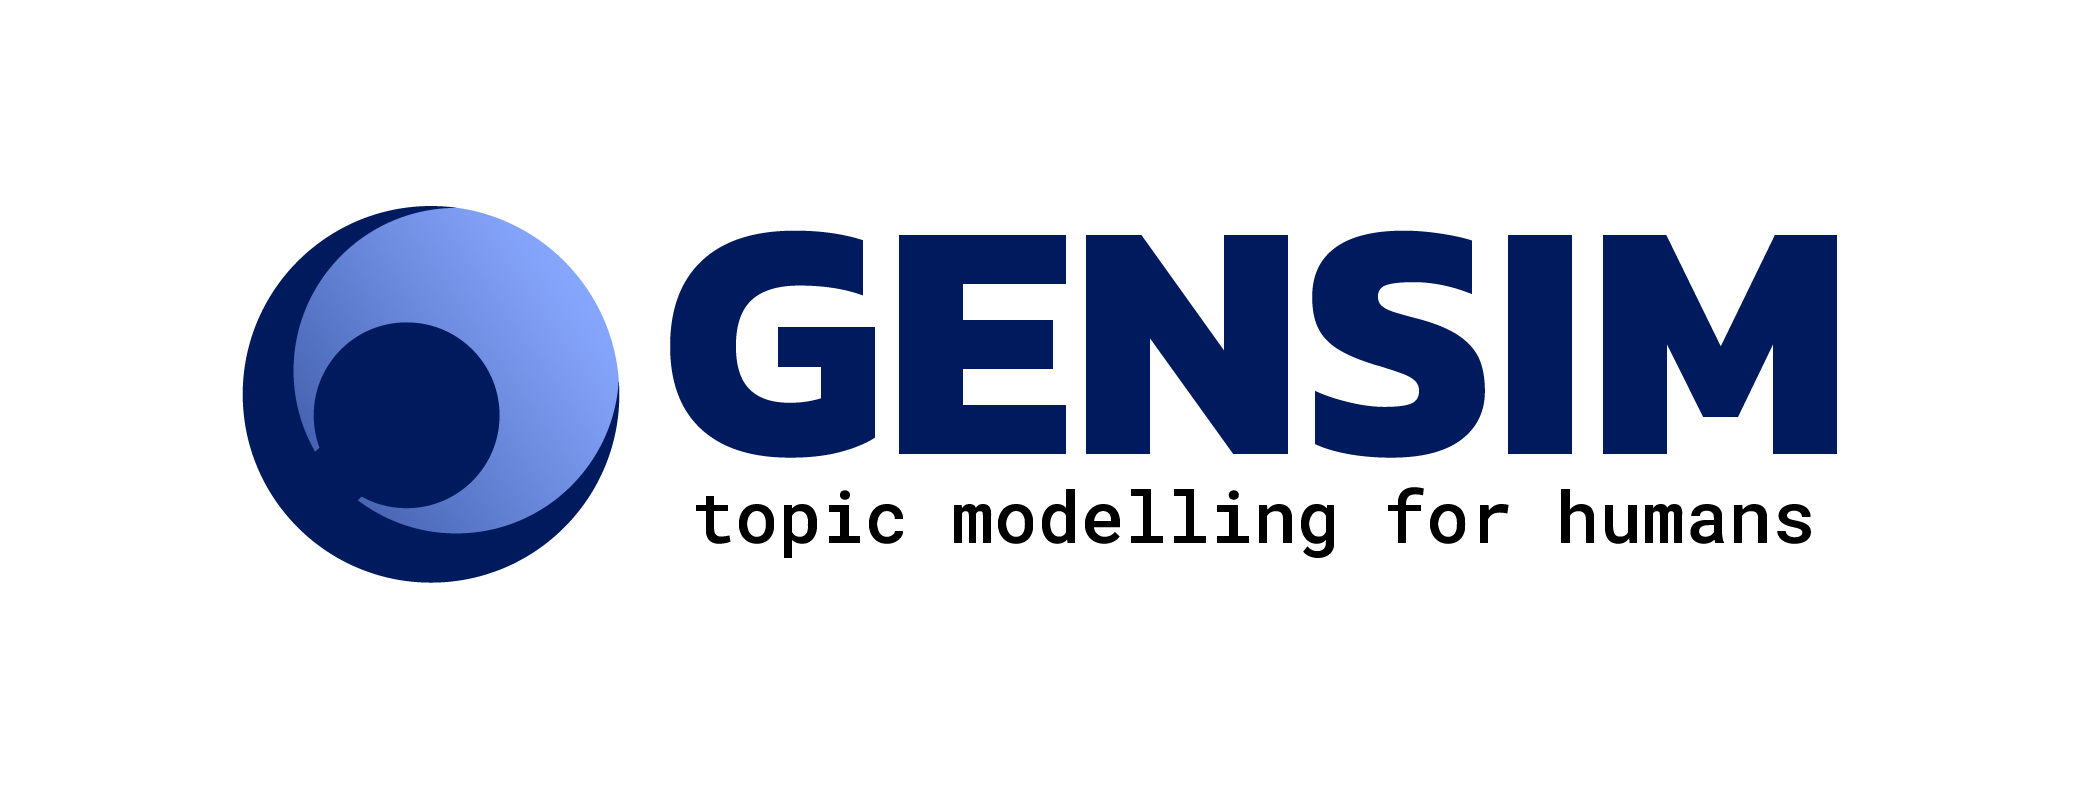


The main focus of Gensim is to handle raw, unstructured digital texts, commonly known as "plain text," using machine learning techniques without the need for supervised guidance.

The suite of algorithms within Gensim, including Word2Vec, FastText, and methods like Latent Semantic Indexing (LSI, LSA, LsiModel) and Latent Dirichlet Allocation (LDA, LdaModel), works autonomously to uncover the underlying semantic relationships within documents by analyzing statistical patterns of co-occurrence present in a training document corpus. These algorithms operate in an unsupervised manner, eliminating the necessity for human intervention, and solely rely on a collection of plain text documents.

Once these statistical relationships are identified, any type of plain text document, be it a sentence, a phrase, or an individual word, can be succinctly transformed into a novel semantic representation. This representation can then be employed to assess thematic similarities between different documents, whether they are composed of words, phrases, or other textual elements.






## Installing Dependencies

In [ ]:
%pip install NLTK
%pip install pyldavis


In [ ]:

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Importing the relevant libraries

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from pprint import pprint
import spacy
import pickle
import re
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import pandas as pd

## Downloading the tweets data

In [ ]:
# tweets = pd.read_csv('/content/gdrive/MyDrive/LDA/dp-export-77711e6c-e900-4724-9d88-06795ddbcd9a.csv')
tweets = pd.read_csv('/content/gdrive/MyDrive/LDA/dp-export-original.csv')

tweets = tweets.Tweets.values.tolist()

# Turn the list of string into a list of tokens
tweets = [t.split(',') for t in tweets]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Building the corpus
Topic modeling involves counting words and grouping similar word patterns to describe topics within the data. If the model understands how often words are used and which words tend to appear together, it will find patterns to group different words.

To begin, we convert a set of words into a "bag of words," which is a list of pairs (word_id, word_frequency).






In [ ]:
id2word = Dictionary(tweets)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tweets]
print(corpus[:1])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 2), (37, 1), (38, 9), (39, 1), (40, 1), (41, 1), (42, 2), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 2), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 5), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 5), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 5), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 4), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

What do these tuples mean? Let’s convert them into human readable format to understand:



In [ ]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[("'d", 1),
  ('-', 1),
  ('absolutely', 1),
  ('aca', 3),
  ('act', 1),
  ('action', 2),
  ('add', 2),
  ('administrative', 1),
  ('affordable', 1),
  ('allow', 1),
  ('amazing', 1),
  ('arrive', 2),
  ('ask', 2),
  ('audits', 1),
  ('av', 1),
  ('avoid', 1),
  ('away', 2),
  ('back', 1),
  ('ball', 1),
  ('baseball', 1),
  ('beget', 2),
  ('begin', 1),
  ('behavior', 1),
  ('believe', 1),
  ('bid', 1),
  ('big', 2),
  ('billy', 1),
  ('board', 1),
  ('bout', 1),
  ('branch', 1),
  ('break', 1),
  ('bring', 1),
  ('brother', 1),
  ('build', 1),
  ('call', 2),
  ('can', 1),
  ('cap', 2),
  ('car', 1),
  ('care', 9),
  ('cell', 1),
  ('certainly', 1),
  ('chair', 1),
  ('change', 2),
  ('chant', 2),
  ('chicken', 1),
  ('child', 1),
  ('chip', 1),
  ('choice', 1),
  ('choke', 1),
  ('chuck', 1),
  ('classification', 1),
  ('close', 1),
  ('come', 2),
  ('community', 2),
  ('compare', 2),
  ('competition', 1),
  ('competitively', 1),
  ('compliant', 1),
  ('conclusion', 1),
  ('conferen

We use gensim.models.ldamode [link text](https://radimrehurek.com/gensim/models/ldamodel.html#gensim.models.ldamodel.LdaModel) topic modelling library

## Training the LDAmodel
Using LDA every topic is presented as a distribution of words

In [ ]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=7
                     ,
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.161*"more" + 0.051*"today" + 0.021*"check" + 0.021*"follow" + '
  '0.019*"pisce" + 0.018*"cancer" + 0.017*"people" + 0.017*"automatically" + '
  '0.015*"capricorn" + 0.014*"aquarius"'),
 (1,
  '0.032*"game" + 0.026*"play" + 0.021*"win" + 0.018*"team" + 0.015*"good" + '
  '0.014*"player" + 0.014*"great" + 0.011*"half" + 0.010*"season" + '
  '0.009*"fan"'),
 (2,
  '0.013*"good" + 0.011*"go" + 0.011*"love" + 0.011*"day" + 0.010*"time" + '
  '0.009*"thank" + 0.008*"look" + 0.008*"year" + 0.008*"think" + 0.008*"know"'),
 (3,
  '0.005*"need" + 0.005*"change" + 0.005*"good" + 0.005*"year" + 0.005*"think" '
  '+ 0.004*"work" + 0.004*"new" + 0.004*"use" + 0.004*"s" + 0.004*"-"'),
 (4,
  '0.010*"woman" + 0.010*"say" + 0.006*"support" + 0.006*"health" + '
  '0.006*"read" + 0.005*"-" + 0.005*"great" + 0.005*"trump" + 0.005*"child" + '
  '0.005*"story"'),
 (5,
  '0.022*"trump" + 0.015*"people" + 0.011*"think" + 0.009*"know" + '
  '0.008*"vote" + 0.008*"need" + 0.008*"right" + 0.007*"say" 

## pyLDAvis

LDAvis is a Python library that provides an interactive visualization for exploring and interpreting topics generated by Latent Dirichlet Allocation (LDA) models. LDAvis stands for "LDA Visualization."

LDAvis uses the output of an LDA model to create an interactive web-based visualization that allows users to explore and understand the underlying topics in a corpus of text. It provides a visual representation of the topics, their keywords, and their relationships.

The visualization consists of two main components:

1) Topic-Word Circles: The topic-word circles represent the topics as circles, with the area of each circle proportional to the topic's prevalence in the corpus. The circles are positioned in a two-dimensional space based on a dimensionality reduction technique called t-SNE (t-Distributed Stochastic Neighbor Embedding). The words most closely associated with each topic are displayed as a word cloud within each circle.

2) Topic-Term Matrix: The topic-term matrix provides an interactive table that shows the top terms for each topic, along with their frequency and relevance scores. The relevance score represents how important a term is to the topic, considering both the probability of the term in the topic and the exclusivity of the term to the topic.

The visualization allows users to interact with the topics by hovering over the circles to reveal the top terms, clicking on a topic to highlight its terms in the matrix, and exploring the inter-topic distances and similarities. This interactive exploration helps users gain insights into the generated topics, identify overlaps or gaps between topics, and discover relationships among the topics.

LDAvis is a valuable tool for both researchers and practitioners working with topic modeling and natural language processing tasks. It facilitates the interpretation and evaluation of LDA models, enabling users to gain a better understanding of the underlying topics in their text data.



## Visualizations


In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.069404  0.066635       1        1  50.997692
5      0.120787 -0.002623       2        1  13.911553
3      0.072342 -0.089303       3        1  13.533723
4      0.097333 -0.120729       4        1   9.296432
6     -0.045921 -0.132989       5        1   6.481711
1      0.040742  0.269979       6        1   3.947968
0     -0.354688  0.009030       7        1   1.830922, topic_info=        Term          Freq         Total Category  logprob  loglift
627    today  15625.000000  15625.000000  Default  30.0000  30.0000
200     more   9716.000000   9716.000000  Default  29.0000  29.0000
339    thank  21832.000000  21832.000000  Default  28.0000  28.0000
231   people  15868.000000  15868.000000  Default  27.0000  27.0000
135    great  16136.000000  16136.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
208      new    223.032784  15853.986014   Topic7  -5.4429  -0.2635
1450   ready    136.947008   2062.066335   Topic7  -5.9306   1.2885
1127    turn    144.299853   3323.234435   Topic7  -5.8783   0.8636
374     work    162.229196  13794.478866   Topic7  -5.7612  -0.4427
344     time    158.390533  18546.460730   Topic7  -5.7851  -0.7626

[629 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
1          1  0.166852     -
1          2  0.188232     -
1          3  0.298279     -
1          4  0.301633     -
1          5  0.042761     -
...      ...       ...   ...
378        4  0.071715  year
378        5  0.027000  year
378        6  0.035736  year
378        7  0.000244  year
12961      2  0.994760     •

[1784 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 4, 5, 7, 2, 1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


λ (Lambda):
In ldavis, λ controls the relevance of terms within a topic. It is a parameter that you can adjust to influence which terms are shown for each topic in the visualization. Higher values of λ will prioritize terms that are more strongly associated with the topic, potentially leading to a more focused and coherent representation of the topic. Lower values of λ will result in a broader range of terms being displayed for the topic.